<a href="https://colab.research.google.com/github/akitim/SkillFactory_current/blob/main/MATH%26ML_7_%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_%D0%9D%D0%B0%D0%B8%D0%B2%D0%BD%D1%8B%D0%B9_%D0%B1%D0%B0%D0%B9%D0%B5%D1%81%D0%BE%D0%B2%D1%81%D0%BA%D0%B8%D0%B9_%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%82%D0%BE%D1%80_%D1%88%D0%B0%D0%B1%D0%BB%D0%BE%D0%BD_%D0%90%D0%BA%D0%B8%D0%BC%D0%BA%D0%B8%D0%BD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Классификация текстов с использованием Наивного Байесовского Классификатора

## Задание 1 (1 балл)

Откройте данные. Узнайте, сколько в них спам- и не спам-писем. Визуализируйте полученные соотношение подходящим образом.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
# import plotly.express as px

# from scipy import stats
# from sklearn import linear_model
# from sklearn import preprocessing
# from sklearn import model_selection
# from sklearn import tree
# from sklearn import ensemble
# from sklearn import metrics
# from sklearn import cluster
# from sklearn import feature_selection

import warnings
warnings.filterwarnings("ignore")

# from sys import getsizeof
# import pickle

# from google.colab import drive
# drive.mount('/content/drive')

path = "https://raw.githubusercontent.com/akitim/datasets/main/spam_or_not_spam.zip"
data = pd.read_csv(path)
data.sample(5)


,email,label
1277,once upon a time jesse wrote when i worked as ...,0
2798,NUMBERcxjkNUMBER NUMBERrlyhNUMBERdcwlNUMBER NU...,1
2949,hello dmm discount mortgage millionaire progr...,1
2499,hi i think you need to give us a little more ...,0
152,from the bbc website URL tuesday NUMBER octob...,0


In [10]:
# частоты классов, 1 - спам, 0 - не спам
class_num = data['label'].value_counts()
print(f"В датасете писем:\n\tcо спамом: {class_num[1]}" +\
      f"\n\tбез спама: {class_num[0]}\n")
class_freq = class_num / data['label'].size
# labels = class_freq.index.to_list()
class_freq

В датасете писем:
	cо спамом: 500
	без спама: 2500



0    0.833333
1    0.166667
Name: label, dtype: float64

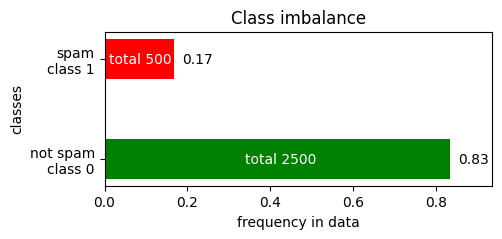

In [73]:
fig, ax = plt.subplots(1, 1, figsize=(5, 2))
ax.barh(y=['not spam\nclass 0', 'spam\nclass 1'], width=class_freq,
        height=0.4, color=['g', 'r']);
ax.set_ylabel('classes');
ax.set_xlabel('frequency in data');
ax.set_title('Class imbalance');
ax.text(class_freq[0] / 2 - 0.078, -0.05, f'total {class_num[0]}',
        fontdict={'size': 10, 'c':'w'});
ax.text(class_freq[0] + 0.02, -0.05, f'{np.round(class_freq[0], 2)}',
        fontdict={'size': 10, 'c':'black'});
ax.text(class_freq[1] / 2 - 0.072, 0.95, f'total {class_num[1]}',
        fontdict={'size': 10, 'c':'w'});
ax.text(class_freq[1] + 0.02, 0.95, f'{np.round(class_freq[1], 2)}',
        fontdict={'size': 10, 'c':'black'});
ax.set_xbound(ax.get_xbound()[0], ax.get_xbound()[1] + 0.06)

In [5]:
# delete
# plt.hist(data.SMS.apply(len).apply(np.log2), bins='rice');
# plt.gca().set_yscale('log')
data[data.SMS.apply(len)<5].SMS

261      Yup
287     Ok..
1612     645
1925      Ok
2182     Ok.
2602    Okie
2688    Okie
3051      Ok
3376     :) 
3492     Ok.
3833     Ok.
3901    Okie
4014     Ok.
4498      Ok
5173    U 2.
5188    Okie
5357      Ok
5471     Yup
Name: SMS, dtype: object

## Задание 2 (2 балла)

Вам необходимо предобработать ваши данные и перевести их в векторный вид. Подгрузим необходимый модуль:

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

Замените в данных все пустые строки и строки, состоящие из пробелов, на пропуски (NaN). После этого удалите из данных все строки, в которых наблюдаются пропущенные значения.

In [8]:
data_clean = data.copy()
data_clean["SMS"] = data_clean["SMS"].str.replace('\W+', ' ').\
    str.replace('\s+', ' ').str.strip().str.lower().str.split()

data_clean["SMS"].sample(5)


4107      [k, then, 2marrow, are, you, coming, to, class]
3436    [hi, darlin, i, cantdo, anythingtomorrow, as, ...
1237                        [how, much, are, we, getting]
1189    [all, will, come, alive, better, correct, any,...
3667    [i, m, turning, off, my, phone, my, moms, tell...
Name: SMS, dtype: object

Переводим данные в векторный вид:

In [14]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data_clean["SMS"])


AttributeError: ignored

Определите, сколько теперь признаков в нашем наборе данных:

In [10]:
print("Признаков в наборе данных:", X.shape[1])

Признаков в наборе данных: 8713


## Задание 3 (2 балла)

Определите целевую переменную и признаки:

In [ ]:
X = X.
#ваш код здесь

Разделите выборку на обучающую и тестовую, используя стратифицированное разбиение (параметр `stratify` установите в значение вектора ответов y) размер тестовой выборки (`test_size`) возьмите как 0.25, параметр `random_state` определите со значением 42:

In [ ]:
#ваш код здесь

Рассчитайте среднее значение целевой переменной по тестовой выборке:

In [ ]:
#ваш код здесь

## Задание 4 (3 балла)

Определите и обучите подходящий алгоритм с параметром alpha = 0.01

In [ ]:
#ваш код здесь

Оцените результат с точки зрения всех известных вам метрик (не менее трёх):

In [ ]:
#ваш код здесь

Нарисуйте ROC-кривую:

In [ ]:
#ваш код здесь

## Задание 5 (3 балла)

Переберите несколько значений alpha с помощью кросс-валидации. Оцените, зависит ли от этого параметра качество классификации.

In [ ]:
#ваш код здесь